In [27]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300
sns.set_palette('RdYlGn')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# read file
df = pd.read_csv(r"C:\Users\Asif Sayyed\Documents\GitHub\MachineLearns\data\Mall_Customers.csv")
# format column names
df.columns = df.columns.str.lower().str.replace('(k$)','')\
                .str.replace('(1-100)','').str.strip().str.replace(' ','_')\
                .str.replace('genre','gender')
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


- There are total 200 rows of data 
- Average age is 39 years old with age ranging from 18 to 70, standard deviation of 13 years
- Average income is 60k with minumum being 15k and maximum being 137 for this dataset
- Spending score ranges from 1 to 100, but the max score we see here is 99 with the average of 50

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- There are no missing values
- The datatypes appear correct

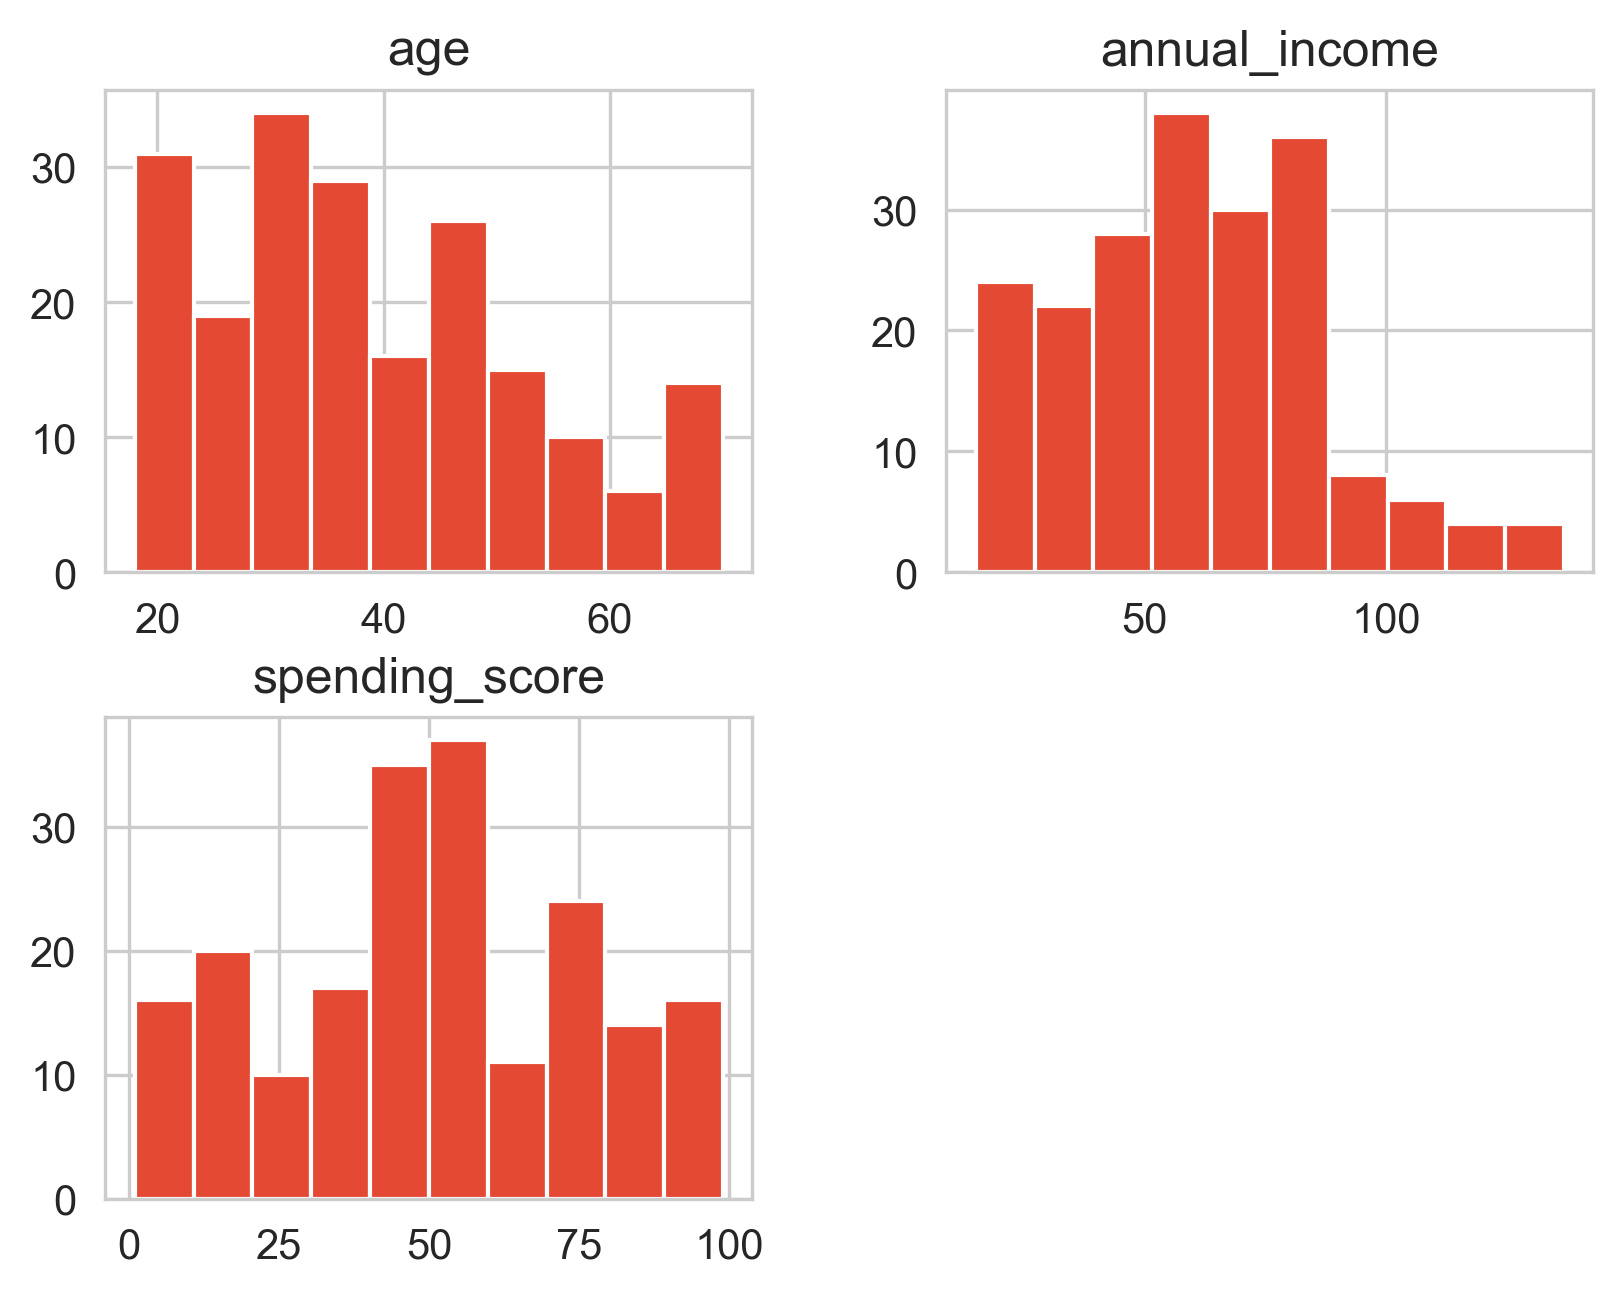

In [12]:
# check variable distribution
num_cols = df.describe().columns.to_list()[1:]
df[num_cols].hist()
plt.show()

- Age is slightly right skewed, in this case it is indicating that we have more datapoints around 18 to 40 and comparatively less ahead of that
- Annual income is also right skewed showing that there are more datapoints that earn average or below average income compared to the above average income range
- Spending score appears to resemble the normal distribution but not completely

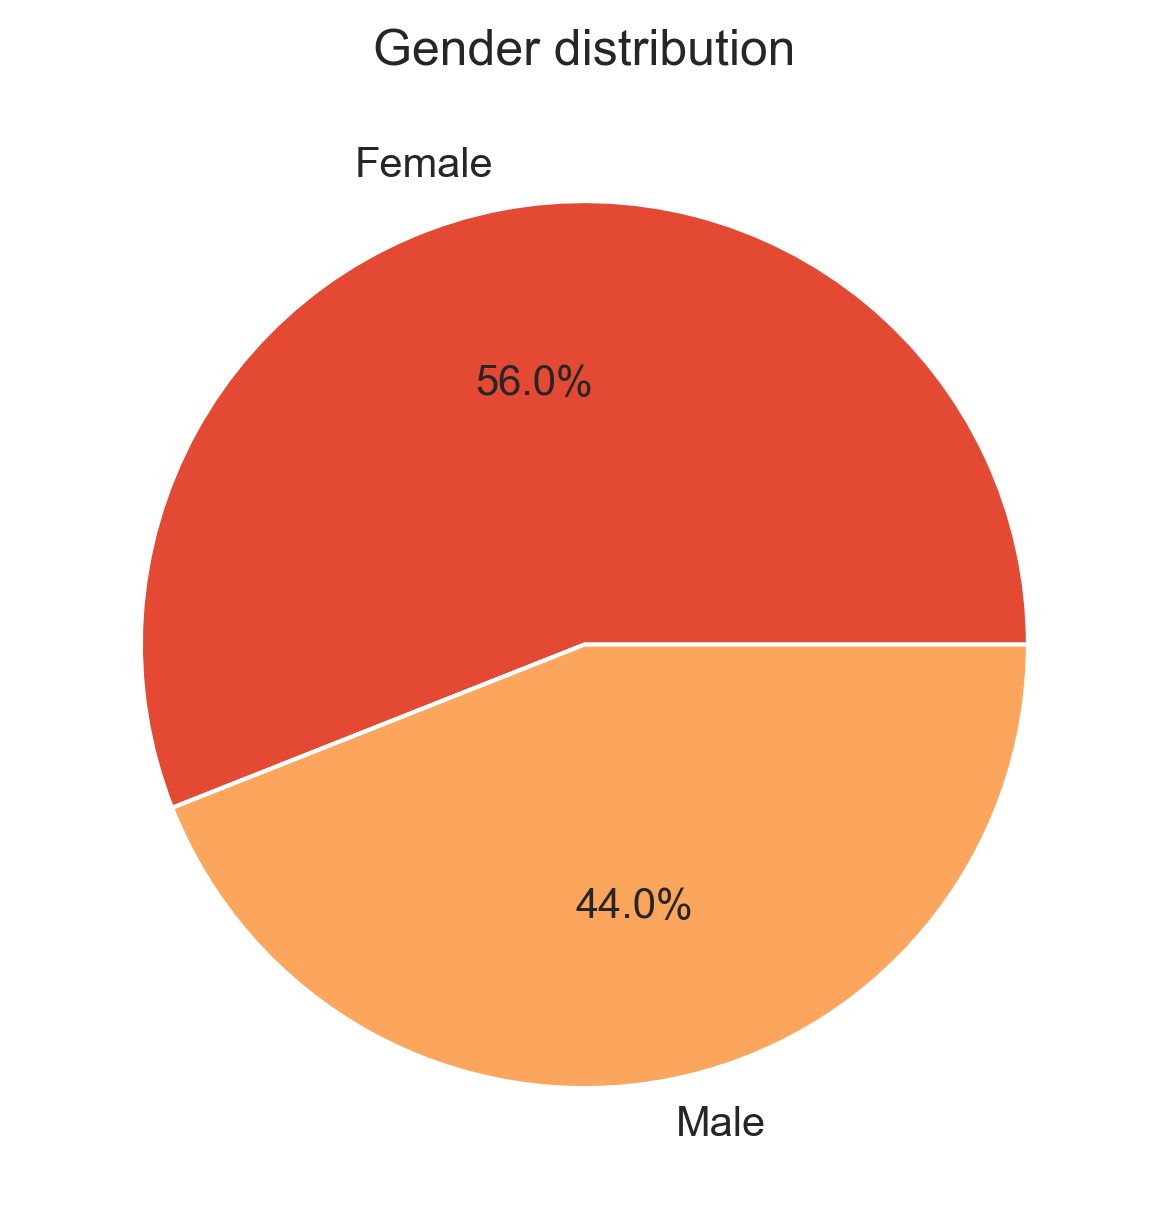

In [13]:
# Visualise gender using pie chart
gender_count = df.gender.value_counts()
plt.pie(gender_count, autopct='%1.1f%%',labels=gender_count.index)
plt.title('Gender distribution')
plt.show()

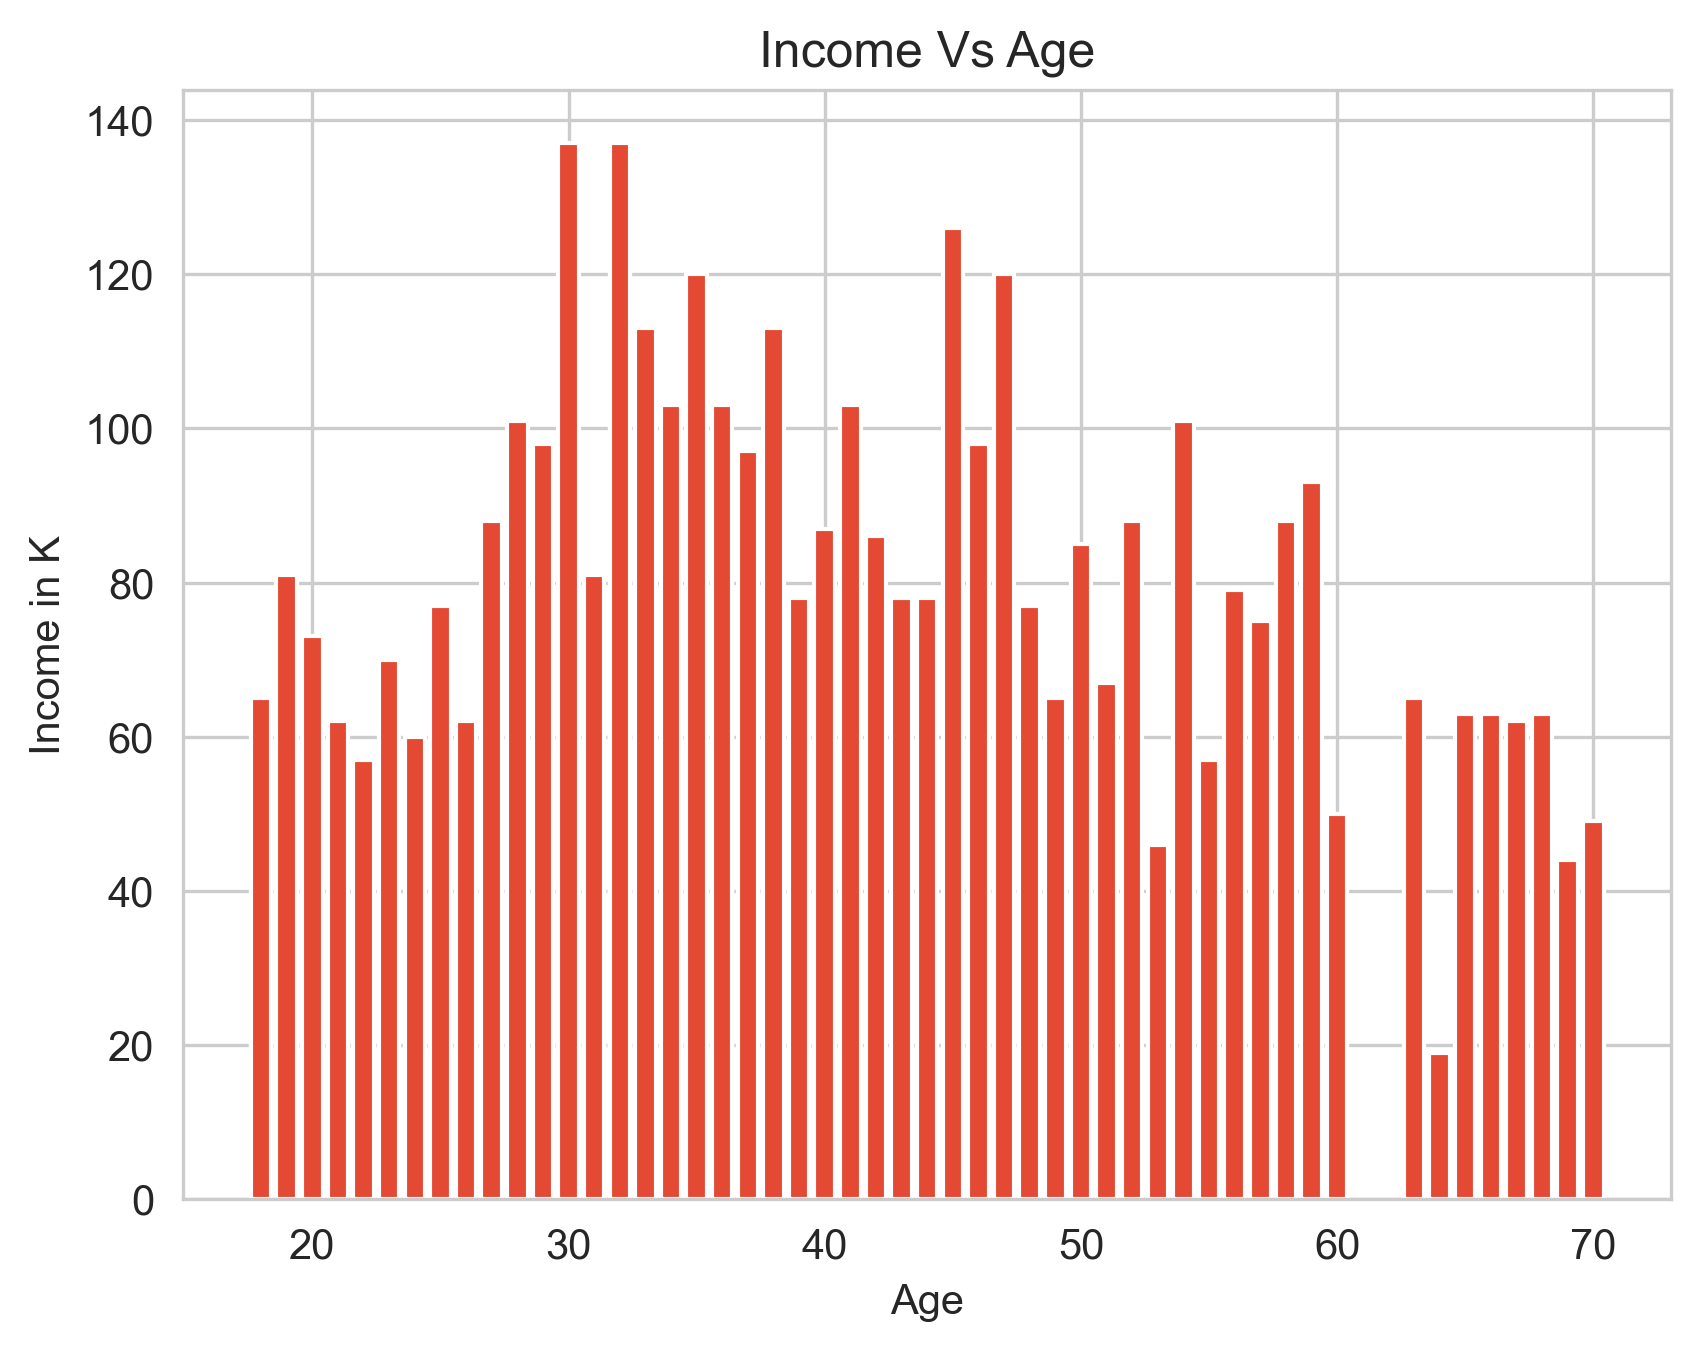

In [14]:
# income vs age barchart plot
plt.bar(df['age'],df['annual_income'])
plt.title('Income Vs Age')
plt.xlabel('Age')
plt.ylabel('Income in K')
plt.show()

# Modeling Training

In [17]:
X = df.iloc[:, [3, 4]].values

In [20]:
# find k with the least within cluster sum squared
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42).fit(X)
    wcss.append(kmeans.inertia_)
    print("cluster (k) as",i)

cluster (k) as 1
cluster (k) as 2
cluster (k) as 3
cluster (k) as 4
cluster (k) as 5
cluster (k) as 6
cluster (k) as 7
cluster (k) as 8
cluster (k) as 9
cluster (k) as 10


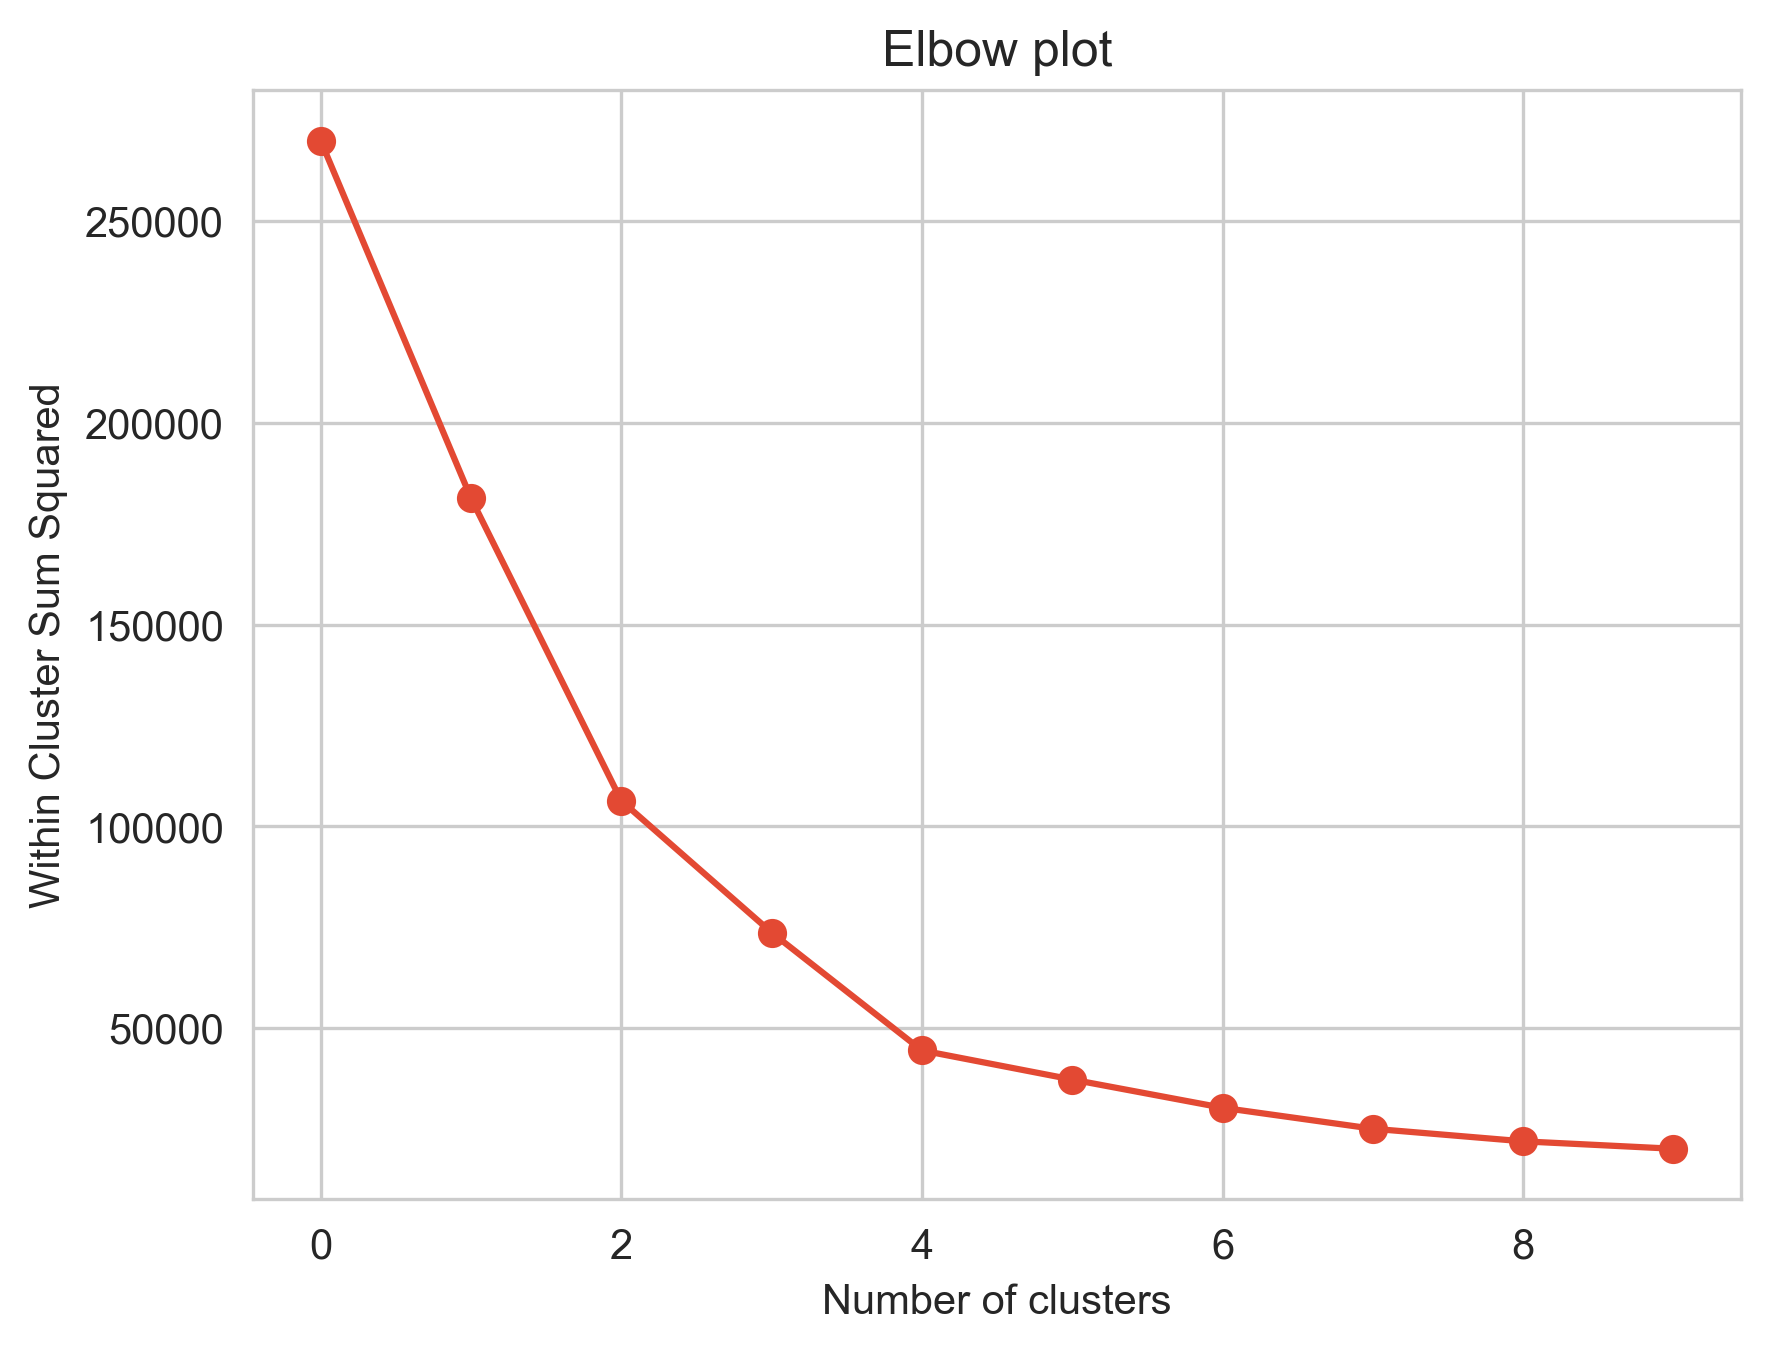

In [26]:
# plotting the elbow plot
plt.plot(wcss, marker='o')
plt.title('Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum Squared')
plt.show()

- It has to be between 5 and 6

In [33]:
kmean5 = KMeans(n_clusters=5,init='k-mean++',random_state=42)
label5 = kmeans.fit_predict(X)
silhouette_score(X,kmeans.labels_,metric='euclidean')

0.4410568674364981

In [34]:
kmean6 = KMeans(n_clusters=6,init='k-mean++',random_state=42)
label6 = kmeans.fit_predict(X)
silhouette_score(X,kmeans.labels_,metric='euclidean')

0.4410568674364981

There is no significant difference between K5 and K6 silhouette_score

In [46]:
kmean = KMeans(n_clusters=5,init='k-mean++',random_state=42)
clusters = kmeans.fit_predict(X)

df['cluster'] = clusters

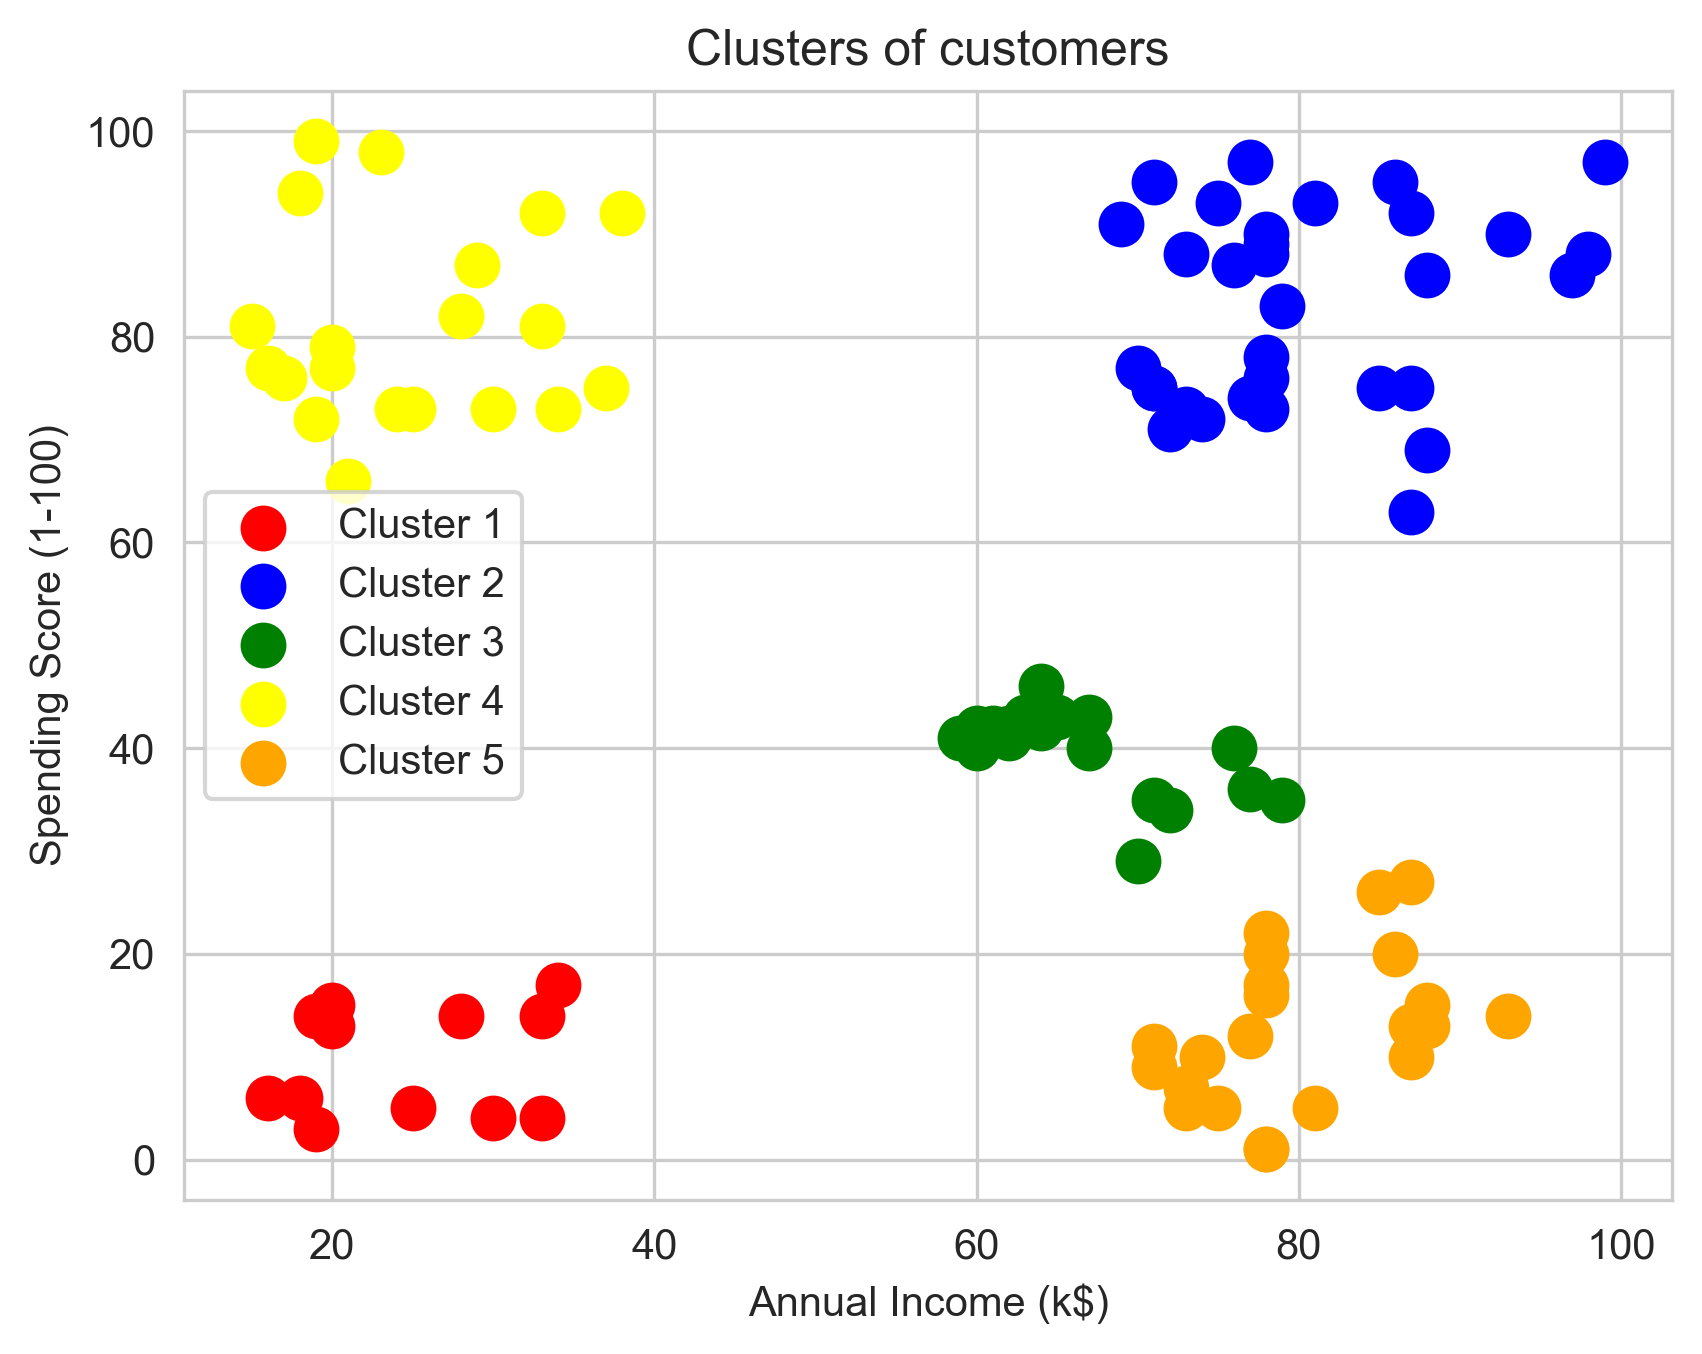

In [48]:
# Plotting clusters
colors = ['red', 'blue', 'green', 'yellow', 'orange']
for cluster_label, color in zip(range(kmean.n_clusters),colors):
    plt.scatter(X[df['cluster'] == cluster_label,0],
                X[df['cluster'] == cluster_label,1],
                s=100, c=color,
                label=f'Cluster {cluster_label + 1}')
    
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
#             s=100, c='black', label='Centroid')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()